In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [2]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

In [3]:
def extract(img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [5]:
# 포켓몬 이름 가져오기
pokemon_name = pd.read_csv("./pokemon.csv")
pokemon_name_list = list(pokemon_name['Name'])

In [7]:
features = []
img_paths = []

for i in pokemon_name_list:
  try:
    image_path = "./images/" + i + ".png"
    img_paths.append(image_path)

    # Extract Features
    feature = extract(img=Image.open(image_path))

    features.append(feature)

    # Save the Numpy array (.npy) on designated path
    # feature_path = "./images/" + i + ".npy"
    # np.save(feature_path, feature)

  except:
    image_path = "./images/" + i + ".jpg"
    img_paths.append(image_path)

    # Extract Features
    feature = extract(img=Image.open(image_path))

    features.append(feature)

    # # Save the Numpy array (.npy) on designated path
    # feature_path = "./images/" + i + ".npy"
    # np.save(feature_path, feature)

c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 93ms/step


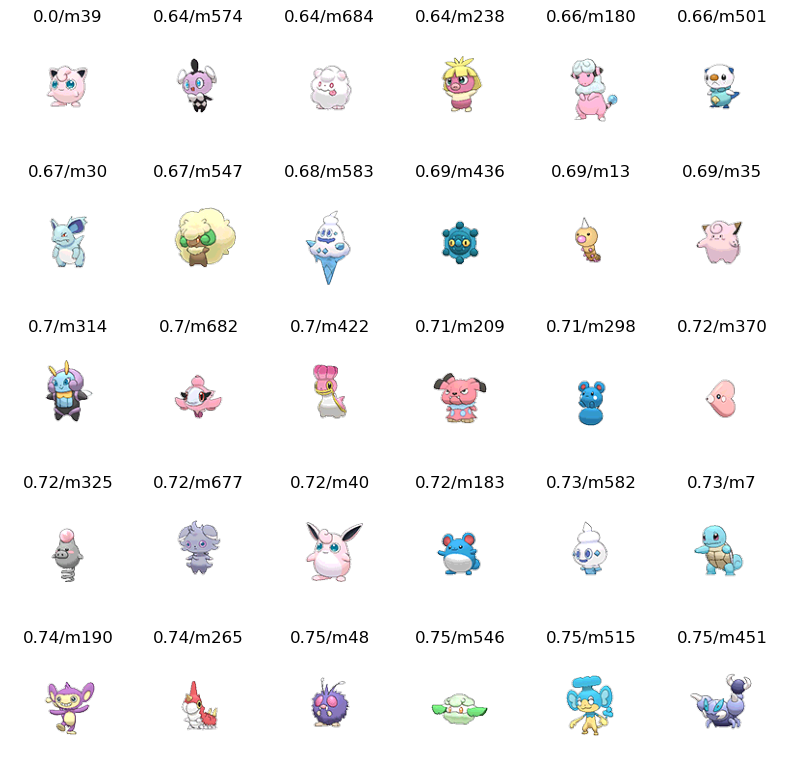

In [14]:
# L2 norm (이미지 간의 거리 기반) 방법을 기반으로 했기에 거리가 작을수록 이미지가 유사하다는 뜻이다.
img = Image.open("./images/jigglypuff.png")
query = extract(img)
dists = np.linalg.norm(features - query, axis=1)
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id], id) for id in ids]

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [144]:
# # 코사인 유사도로 구하는 방법 (하나 vs 하나 비교)
# img1 = Image.open("./images/jigglypuff.png")
# img2 = Image.open("./images/igglybuff.png")

# feature1 = np.load("./images/jigglypuff.npy", allow_pickle=True)
# feature2 = np.load("./images/igglybuff.npy", allow_pickle=True)


# dists = cos_sim(feature1, feature2)
# print(dists)
# display(img1, img2)


0.67934173


In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image

# # 코사인 유사도를 구하는 함수
# from numpy import dot
# from numpy.linalg import norm

# def cos_sim(a, b):
#     return dot(a, b) / (norm(a) * norm(b))

# # 이미지 경로와 피쳐 데이터를 불러옵니다.
# img_paths  # 이미지 파일 경로 리스트
# features

# # 기준이 되는 이미지
# base_image_path = "./images/pikachu.npy"
# feature1 = np.load(base_image_path, allow_pickle=True)

# # 각 이미지의 코사인 유사도를 계산하고 정렬
# cos_scores = []
# for feature in features:
#     similarity = cos_sim(feature1, feature)
#     cos_scores.append(similarity)

# # 코사인 유사도가 높은 순서대로 이미지와 점수를 정렬
# sorted_indices = np.argsort(cos_scores)[::-1]  # 내림차순 정렬된 인덱스
# sorted_scores = [cos_scores[i] for i in sorted_indices]

# # 상위 30개 이미지 선택
# top_n = 30
# selected_paths = [img_paths[i] for i in sorted_indices[:top_n]]
# selected_scores = sorted_scores[:top_n]

# # 이미지 그래프 그리기
# plt.figure(figsize=(15, 8))
# for i, (path, score) in enumerate(zip(selected_paths, selected_scores)):
#     plt.subplot(5, 6, i + 1)
#     img = Image.open(path)
#     plt.imshow(img)
#     plt.title(f"Score: {score:.2f}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [11]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b) / (norm(a) * norm(b))

cos_scores = []
for feature in features:
    similarity = cos_sim(query, feature)
    cos_scores.append(similarity)

1/1 [==============================] - 0s 95ms/step


c:\ProgramData\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


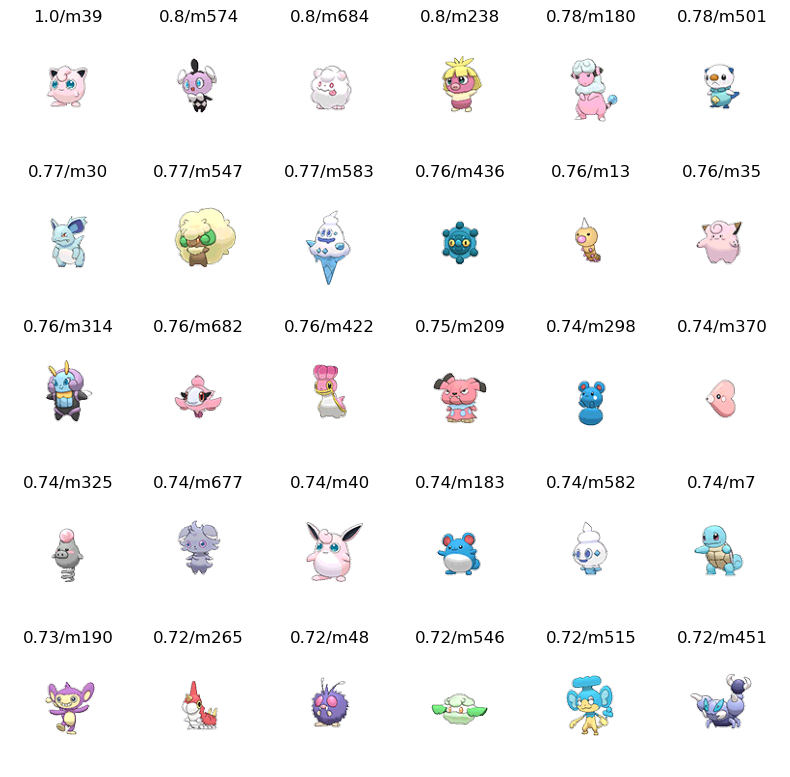

In [17]:
img = Image.open("./images/jigglypuff.png")
query = extract(img)
dists = cos_scores
ids = np.argsort(dists)[::-1]
scores = [(dists[id], img_paths[id], id) for id in ids]

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()